In [1]:
import sys
import scipy.stats as ss
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import itertools
from tqdm import tqdm
import warnings
import networkx

In [2]:
import gempy as gp

ModuleNotFoundError: No module named 'gempy'

In [2]:
from pathlib import Path
fp = Path("./data/abc/")

In [3]:
with open(fp / "priors.p", "rb") as f:
    priors = pickle.load(f)
    
with open(fp / "traces.p", "rb") as f:
    posteriors = pickle.load(f)

In [4]:
color_kwargs = {
    "Sandstone_2_Z": "#EF5350",
    "Siltstone_Z": "#FFDF50",
    "Shale_Z": "#66BB6A",
    "Sandstone_1_Z": "#8D6E63",
    "Main_Fault_X": "steelblue",
    "Main_Fault_Z": "steelblue"
}

In [5]:
import scipy.stats
sys.path.append("../../../toolbox/")
from toolbox import plot as ph

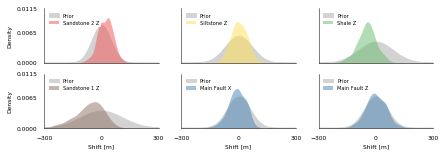

In [7]:
hist_kwargs = dict(bins=12, density=True)


font_size = 6
with plt.rc_context(ph.get_rcparams(font_size)):
    x = np.linspace(-300, 300, 500)
    fig, axes = plt.subplots(
        nrows=2, ncols=3, sharex=True, sharey=True, 
        figsize=ph.get_figsize(1, textwidth=503.61377, ratio=0.35)
    ) 
    for i, (ax, (name, posterior)) in enumerate(zip(axes.flat, posteriors.items())):
#         ax.text(-290, 0.0106, name, fontsize=font_size)


        y = priors[i].pdf(x)
#         ax.plot(x, y, color="lightgrey", linewidth=1)
        ax.fill_between(x, y, color="lightgrey", alpha=1, label="Prior")

        rf = 3500
        post_kde = scipy.stats.gaussian_kde(posterior * rf)
        ypost = post_kde.pdf(x)
        
        # ax.plot(
        #     x, ypost,
        #     color=color_kwargs[name],
        #     linewidth=1
        # )
        label = name
        label = label.replace("_", " ")
        
        ax.fill_between(
            x, ypost, color=color_kwargs[name], alpha=0.5, linewidth=0,
            label=label)
        
        mean = np.mean(posterior * rf)
        std = np.std(posterior * rf)
#         ax.text(mean, 0.01, f"μ {mean:.01f}")
#         ax.axvline(mean, linewidth=0.75, color="white", linestyle="solid")
#         ax.axvline(mean - std, linewidth=0.75, color="white", linestyle="solid")
#         ax.axvline(mean + std, linewidth=0.75, color="white", linestyle="solid")
        legend = ax.legend(prop={"size": font_size - 1}, loc="upper left")
        legend.get_frame().set_edgecolor("none")
        

#         ax.hist(posterior * rf, color=color_kwargs[name], **hist_kwargs)

        ax.set_xlim(-300, 300)
        ax.set_ylim(0, 0.0115)
        ax.set_yticks([0, 0.0065, 0.0115])
        ax.set_xticks([-300, 0, 300])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.xaxis.set_ticks_position('none') 
        ax.yaxis.set_ticks_position('none')
        for axis in ['top','bottom','left','right']:
              ax.spines[axis].set_linewidth(0.5)

    axes[1,0].set_xlabel("Shift [m]")
    axes[1,1].set_xlabel("Shift [m]")
    axes[1,2].set_xlabel("Shift [m]")
    axes[0,0].set_ylabel("Density")
    axes[1,0].set_ylabel("Density")
    
    

    plt.savefig("../../paper/figures/exp1_distplot2.pdf", bbox_inches='tight', dpi=300)

[7.222914072229141, 4.478206724782067]